# Chapter 10 - Position and Momentum
We can start using sympy to handle symbolic math (integrals and other calculus):

In [90]:
from sympy import *

In [91]:
init_printing(use_unicode=True)

In [92]:
# SymPy works better if you specify what letters are symbols:
x, y, z = symbols('x y z', real=True)

# notice we can also put some restrictions on the symbols:
a, c = symbols('a c', nonzero=True, real=True) 

In [14]:
integrate?

There are two ways to use the `integrate` function. In one line, like `integrate(x,(x,0,1))` or by naming an expression and then integrating it over a range:

```
A = (c*cos((pi*x)/(2.0*a)))**2
A.integrate((x,-a,a),conds='none')
```

We'll use both, at different times. For longer expressions, the second form can be easier to read and write.

First, just try the following, then we'll re-create some examples in the book.

In [15]:
integrate(x,(x,0,1))

In [16]:
integrate(x**2,(x,0,1))

In [17]:
A = (c*cos((pi*x)/(2.0*a)))**2
A.integrate((x,-a,a))

So this tells us the normalization constant should be $c=\frac{1}{\sqrt{a}}$. Check that it is normalized if we do that:

In [18]:
psi = 1/sqrt(a)*cos((pi*x)/(2.0*a))  # notice we can name the expression something useful.
B = psi**2
B.integrate( (x,-a,a), conds='none')

Because `psi` is a real function, we can calculate expectation values by integrating over $x$ or $x^2$ with `psi**2`:

In [19]:
C = x*psi**2
C.integrate( (x,-a,a), conds='none')

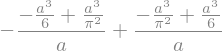

In [24]:
D = x**2 * psi**2
E = D.integrate( (x,-a,a), conds='none')
E

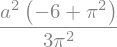

In [26]:
E.simplify()  # this is a useful method!

In [27]:
E.n()  # the .n() method approximates the numerical part. You can look at the full expression below.

## Example 10.2

In [55]:
h = Symbol('hbar', real=True, positive=True)

Use the `diff` function to take a derivative of a symbolic expression. For example:

In [29]:
diff(x**2, x)

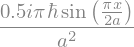

In [30]:
# Solution
-1j*h*diff( 1/a*cos((pi*x)/(2*a)) ,x)

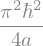

In [31]:
# Solution
B1 = (pi*h/(2*a))**2 * (cos((pi*x)/(2*a)))**2
B1.integrate( (x,-a,a), conds='none' )

## Example 10.3

In [32]:
p = Symbol('p', real=True) 

In [33]:
# Solution
A = integrate(1/sqrt(2*pi*a*h)*exp(-I*p*x/h)*cos((pi*x)/(2*a)),(x,-a,a), conds='none')

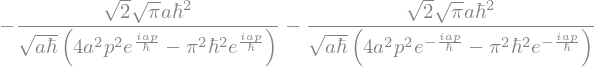

In [34]:
# Solution
A

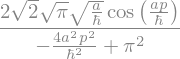

In [37]:
psi_p = sqrt(2*a*pi/h) * 2/(pi**2 - (2*p*a/h)**2) * cos(p*a/h)
psi_p

In [38]:
psi_p == sqrt(2*a*pi/h)*2/(pi**2 - (2*p*a/h)**2) * cos(p*a/h)

True

Which agrees with the book.

This is about as far as we can go in sympy. Unfortunately, many other momentum integrals choke. There are a few hints to get through the rest here:

## Problem 10.3

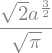

In [40]:
x, y, z = symbols('x y z', real=True)
a, c = symbols('a c', nonzero=True, real=True, positive=True)

psi = c*1/(a**2 + x**2)  # define the wavefunction with c constant
int1 = integrate(psi*psi,(x,-oo,oo), conds='none')  # integrate psi^2
solutions = solve(int1 - 1,c)  # solve for c, this returns a list of solutions
c2 = simplify(solutions[0])  # simplify the solution for c:
c2

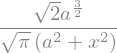

In [41]:
psi2 = c2/c*psi
psi2

In [42]:
integrate(psi2 * x * psi2,(x,-oo,oo))

In [43]:
integrate(psi2 * x**2 * psi2,(x,-oo,oo))

So $\Delta x^2 = a^2 - 0^2$ therefore $\Delta x = a$

## Problem 10.17:
Now find the momentum representation of the state from 10.3

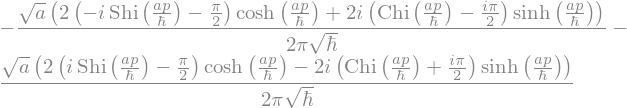

In [56]:
p = symbols('p', nonzero=True, real=True, positive=True)
B = integrate(sqrt(1/(2*pi*h))*exp(-I*p*x/h)*psi2,(x,-oo,oo))
B

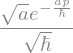

In [57]:
B.simplify()

This agrees with the book after we notice that we had to force $p$ to be positive in order to get the integral to converge. The book has $|p|$ in the argument of the exponent to reflect this constraint.

## Problem 10.13

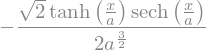

In [93]:
psi = 1/sqrt(2*a)*sech(x/a)
dpsi = diff(psi,x)
dpsi

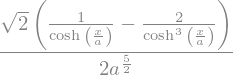

In [94]:
ddpsi = diff(dpsi,x)
ddpsi = ddpsi.simplify()
ddpsi

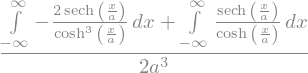

In [95]:
expect_p = integrate(psi*ddpsi,(x,-oo,oo))
expect_p